## QTC realisation in Qiskit

This is the code file where I try to make the quantum circuit representing a time crystal in Qiskit. I started by looking at a simpler circuit and building from that.

In [2]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1)

qc_ha.draw()

┌───┐ ░            ░       
q_0: ┤ X ├─░───■────────░───────
     ├───┤ ░   │        ░       
q_1: ┤ X ├─░───┼────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐ ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├─░─┤M├───
           ░ └───┘└───┘ ░ └╥┘┌─┐
q_3: ──────░────────────░──╫─┤M├
           ░            ░  ║ └╥┘
c: 2/══════════════════════╩══╩═
                           0  1

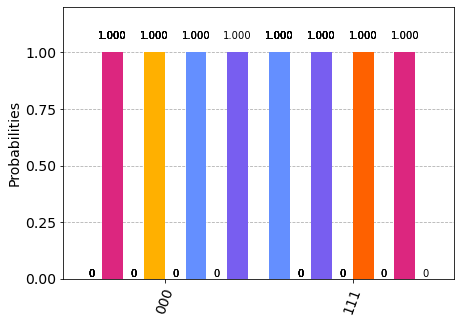

In [3]:
# Run these two also if the first cell hasn't been run!
from qiskit import QuantumCircuit, execute, Aer
import scipy
from scipy import pi as pi
from qiskit.visualization import plot_histogram

# print(pi) # Test to ensure pi is imported - it was.

# Create the circuit of 3 qubits
qtc = QuantumCircuit(3)
backend = Aer.get_backend('statevector_simulator')
qtc.initialize([1,0], 0)
qtc.initialize([1,0], 1)
qtc.initialize([1,0], 2)

# Parameter for how many cycles you want to run and an empty list for storing state data.
L = 8
statedata = []
histogram = []
for i in range(L):    
    qtc.x(0)
    qtc.x(1)
    qtc.x(2)
    qtc.crz(pi/2, 0, 1)
    qtc.crz(pi/2, 1, 2)
    # Put some measuring parameter here and add to a list
    state = execute(qtc, backend).result().get_statevector()
    # print("Quibits state is = ", state)
    statedata.append(state)
    results = execute(qtc,backend).result().get_counts()
    histogram.append(results)
    #counts = state.get_counts()
    #print(state)
    qtc.barrier()
#qtc.draw()
    
# print(statedata)
#print(histogram)


plot_histogram(histogram)

From this, I've obtained the data simulating the time crystal, now I plan to take the data and plot the magnetisation.

With a running model, I've used the outputs to generate the desired graph (although it's idealised, as it's being run on an ideal backend rather than a real quantum backend with noise). 

[0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8] [-1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1]
000


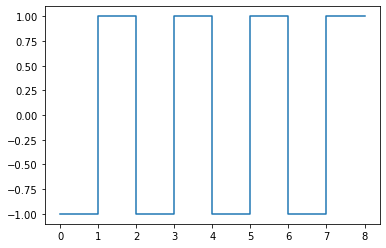

In [67]:
mag = []; T = []
for i in range(len(histogram)):
    if '000' in histogram[i]:
        mag.append(1)
        mag.append(1)
    elif '111' in histogram[i]:
        mag.append(-1)
        mag.append(-1)
    else: break
    T.append(i)
    T.append(i+1)
print(T, mag)

import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()

ax.plot(T, mag)

print(str(3*'0')) # Can use this form in the conditions above with q substituted for 3

┌─────────────────┐┌───┐                       ░ ┌───┐           »
q_0: ┤ initialize(1,0) ├┤ X ├─────■─────────────────░─┤ X ├─────■─────»
     ├─────────────────┤├───┤┌────┴────┐            ░ ├───┤┌────┴────┐»
q_1: ┤ initialize(1,0) ├┤ X ├┤ RZ(π/2) ├─────■──────░─┤ X ├┤ RZ(π/2) ├»
     ├─────────────────┤├───┤└─────────┘┌────┴────┐ ░ ├───┤└─────────┘»
q_2: ┤ initialize(1,0) ├┤ X ├───────────┤ RZ(π/2) ├─░─┤ X ├───────────»
     └─────────────────┘└───┘           └─────────┘ ░ └───┘           »
«                 ░ ┌───┐                       ░ ┌───┐                      »
«q_0: ────────────░─┤ X ├─────■─────────────────░─┤ X ├─────■────────────────»
«                 ░ ├───┤┌────┴────┐            ░ ├───┤┌────┴────┐           »
«q_1: ─────■──────░─┤ X ├┤ RZ(π/2) ├─────■──────░─┤ X ├┤ RZ(π/2) ├─────■─────»
«     ┌────┴────┐ ░ ├───┤└─────────┘┌────┴────┐ ░ ├───┤└─────────┘┌────┴────┐»
«q_2: ┤ RZ(π/2) ├─░─┤ X ├───────────┤ RZ(π/2) ├─░─┤ X ├───────────┤ RZ(π/2) ├»
«     └─────────┘ ░ └───┘           └─────────┘ ░ └───┘           └─────────┘»
«      ░ ┌───┐                       ░ ┌───┐                       ░ ┌───┐»
«q_0: ─░─┤ X ├─────■─────────────────░─┤ X ├─────■─────────────────░─┤ X ├»
«      ░ ├───┤┌────┴────┐            ░ ├───┤┌────┴────┐            ░ ├───┤»
«q_1: ─░─┤ X ├┤ RZ(π/2) ├─────■──────░─┤ X ├┤ RZ(π/2) ├─────■──────░─┤ X ├»
«      ░ ├───┤└─────────┘┌────┴────┐ ░ ├───┤└─────────┘┌────┴────┐ ░ ├───┤»
«q_2: ─░─┤ X ├───────────┤ RZ(π/2) ├─░─┤ X ├───────────┤ RZ(π/2) ├─░─┤ X ├»
«      ░ └───┘           └─────────┘ ░ └───┘           └─────────┘ ░ └───┘»
«                            ░ ┌───┐                       ░ 
«q_0: ─────■─────────────────░─┤ X ├─────■─────────────────░─
«     ┌────┴────┐            ░ ├───┤┌────┴────┐            ░ 
«q_1: ┤ RZ(π/2) ├─────■──────░─┤ X ├┤ RZ(π/2) ├─────■──────░─
«     └─────────┘┌────┴────┐ ░ ├───┤└─────────┘┌────┴────┐ ░ 
«q_2: ───────────┤ RZ(π/2) ├─░─┤ X ├───────────┤ RZ(π/2) ├─░─
«                └─────────┘ ░ └───┘           └─────────┘ ░

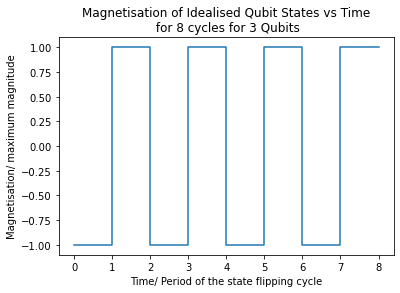

In [2]:
# Now, attempting to combine everything into a neat function. 
# Below are all the packages required to run the function. Alternatively, they could be called in the function
# however I could to import them all here rather than import them each time the function's called.
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
import scipy
from scipy import pi as pi
import matplotlib.pyplot as plt
#import numpy as np # Not used in this version of the function

def QTC(L, q):
    """
    I've defined the number of cycles the code is run over as L, and q is the number of qubits being simulated.
    
    This function takes all the qubits initially in [1, 0] or |0> state, and flips the spins, performs a rotation
    operation on each qubit relative to another one and "measures" the resulting state. I say "measure" since it's
    run on a simulator and no actual measurement is being carried out on a quantum device.
    
    Once it's been run over all cycles, the resulting data is stored in a list which is appended after each cycle recording 
    the state measured and the probability of measuring that state. We then include a barrier between each cycle, so it's
    clear each cycle is performed independently.
    
    From this data, the graph plotting magnetisation vs time expressed as the number of cycles the system has gone though, 
    is plotted and it should show the system has a period double that of the driving field.
    """
    qtc = QuantumCircuit(q)
    backend = Aer.get_backend('statevector_simulator')
    for i in range(q):
        qtc.initialize([1,0], i)
    #statedata = []
    histogram = []
    for i in range(L):    
        for j in range(q):
            qtc.x(j)
        # These are the rotational control gates coupling qubits. The code I attempted to implement this automatically
        # didn't run too well, this was the second attempt running the code. 
        for k in range(q):
            # theta = pi/4 * np.random.randint(1, 15)/20 # Attempted to introduce this random number for the angle but
            # it had no discernable affect on the histogram plot but may have an affect on the statedata.
            if k + 1 < q:
                qtc.crz(pi/2, k, k+1)
            else: break
        # This is the code to run with q = 3, 3 qubits coupled to the consecutive one.
        #qtc.cp(pi/2, 0, 1)
        #qtc.cp(pi/2, 1, 2)
        
        # This code calculated the exact state, which was helpful to ensure the code was running 
        # as I hoped but isn't needed in the calcuations
        #state = execute(qtc, backend).result().get_statevector()
        # print("Quibits state is = ", state)
        #statedata.append(state)
        results = execute(qtc, backend).result().get_counts()
        histogram.append(results)
        #counts = state.get_counts()
        #print(state)
        qtc.barrier()
    qtc.draw()
    #plot_histogram(histogram)
    
    # With the data, the graph plot can be made. At this point, I assumed only |000> or |111> states were present and 
    # this was plotted to a corresponding magnetisation of 1 or -1.
    # Note: to be more accurate, I could try and identify the most probable state out of each cycle and plot the probability
    # of |000> or |111> states as +/- the total magnetisation. However, this change would only be significant if running 
    # this code on a real backend as the simulator only showed these states when I plotted the states of each cycle on a
    # histogram (see earlier code). 
    # The amendment str(q*'0') generalises to q Qubits in the circuit all being in the same state.
    mag = []; T = []
    for i in range(len(histogram)):
        if str(q*'0') in histogram[i]:
            mag.append(1)
            mag.append(1)
        elif str(q*'1') in histogram[i]:
            mag.append(-1)
            mag.append(-1)
        else: break
        T.append(i)
        T.append(i+1)
    
    # Now it's just taking everything previously and plotting it on a graph.
    # There's also the option to uncomment filename and plt.savefig to save to the sub folder with the MPHYS project work
    # in it reserved for plots from this code; it may be worth generating a few more plots to illustrate the general idea
    # and make the presentation look busier.
    fig = plt.figure()
    ax = plt.axes()

    ax.plot(T, mag)
    title = "Magnetisation of Idealised Qubit States vs Time\n for " + str(L) + " cycles for " + str(q) + " Qubits"
    filename = "Graph of Magnetisation vs Time for "+ str(L) + " cycles for " + str(q) + " Qubits"
    plt.title(title)
    plt.xlabel("Time/ Period of the state flipping cycle")
    plt.ylabel("Magnetisation/ maximum magnitude")
    #plt.savefig('Documents\MPHYS project\Realisation of QTC code plots/'+filename+'.png')
    
    return qtc.draw()
    
#QTC(21,5)  
QTC(8, 3)

# N.B. Code only plots this for 3 qubits... Might be worth trying to simulate larger systems and adjusting this code
# slightly. I think this is due to the labelling of states when appending data to be plotted. 

# On 04/02, this was fixed so it in principle works for any number of qubits q defined using str(q*'0') in place of 
# the label defined for a specific string which is a length of q, the number of qubits.

Writing the code from earlier into a function and then tweaking a few bits, I was able to create the expected results rather nicely. I could copy the above cell to a Spyder document and run the code in an IDE, which may be more accessible thn opening this file every time; all functions are imported so the cell runs on its own anyway.

In [5]:
# Investigation into a random rotation on the statevector

import numpy as np 
from qiskit import QuantumCircuit, execute, Aer
import scipy
from scipy import pi as pi
from qiskit.visualization import plot_histogram

Qc = QuantumCircuit(3)
backend = Aer.get_backend('statevector_simulator')
for i in range(3):
    Qc.initialize([1,0], i)
statedata = []
histogram = []
for i in range(5): # L = 5, q = 3
    for j in range(3):
        Qc.x(j)
    for k in range(3):
            theta = (pi/5) * (np.random.randint(1, 15)/110) # Attempted to introduce this random number for the angle
            # to simulate randomness of quantum behaviour to the environment
            Qc.rx(theta, k)
            
    state = execute(Qc, backend).result().get_statevector()
    #print("Quibits state is = ", state)
    statedata.append(state)
    results = execute(Qc, backend).result().get_counts()
    histogram.append(results)
print(statedata, '\n', histogram)

[array([ 0.00000000e+00+5.86884769e-06j, -6.84957726e-04+0.00000000e+00j,
       -2.93521384e-04+0.00000000e+00j,  0.00000000e+00-3.42571064e-02j,
       -1.71176571e-04+0.00000000e+00j,  0.00000000e+00-1.99781492e-02j,
        0.00000000e+00-8.56113273e-03j,  9.99176384e-01+0.00000000e+00j]), array([ 9.97510315e-01+0.00000000e+00j,  0.00000000e+00-2.56455934e-02j,
        0.00000000e+00-5.41819644e-02j, -1.39299675e-03+0.00000000e+00j,
        0.00000000e+00-3.70525033e-02j, -9.52605121e-04+0.00000000e+00j,
       -2.01258813e-03+0.00000000e+00j,  0.00000000e+00+5.17428402e-05j]), array([ 0.        +0.00022193j, -0.00352747+0.j        ,
       -0.00250011+0.j        ,  0.        -0.03973812j,
       -0.00554751+0.j        ,  0.        -0.08817516j,
        0.        -0.0624946j ,  0.99332317+0.j        ]), array([ 0.99067731+0.j        ,  0.        -0.06516922j,
        0.        -0.09364658j, -0.0061603 +0.j        ,
        0.        -0.07369907j, -0.00484811+0.j        ,
       -0.

From this code, randomising the rotation angle doesn't change the probability of the state being observed, it's still only |000> or |111> states being observed (only non-zero state amplitudes are these states), as can be seen by the results from the histogram array. So, I don't think randomising the angle will have a discernable effect on magnetisation values seen. May as well omit it to reduce the complexity of the function. Only difference is the value obtained for the complex amplitudes but it doesn't change the probability of the state being observed, and all other states are zero.

However, changing the rotation angle to being rx significantly changes the state observed.